In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt


import seaborn as sns

/kaggle/input/applicant-details-for-loan-approve/Applicant-details.csv


![img](https://th.bing.com/th/id/OIP.Nv9p7FZ_v8fb_t4zzK-RsgHaE7?rs=1&pid=ImgDetMain)

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/applicant-details-for-loan-approve/Applicant-details.csv')

In [4]:
df.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


# Categorical features vs. Numerical 
in this dataset we have both datatypes. for the numeric ones we need to check for null, duplicated, etc bu for the categorical one we also need to convert them to numeric form to be able to do further analysis so here we will kick start by the categrocal feature processing which are:

In [5]:
df.dtypes

Applicant_ID                    int64
Annual_Income                   int64
Applicant_Age                   int64
Work_Experience                 int64
Marital_Status                 object
House_Ownership                object
Vehicle_Ownership(car)         object
Occupation                     object
Residence_City                 object
Residence_State                object
Years_in_Current_Employment     int64
Years_in_Current_Residence      int64
Loan_Default_Risk               int64
dtype: object

In [6]:
cat_features = ['marital_status', 'house_ownership', 'car_ownership', 'occupation',
       'residence_c', 'residence_state']

# Vehicle_Ownership(car) 
this is a categorical datatype that we need to handle it, 
Now there are different approaches to handle such datatype for instance
1. we can use numpy to convert yes/no to 1/0 
2. we can use Sklearn.labelEncoder to convert them to numeric values but NOTE that if you choose to select this method, you should br aware that in heart of this label encoder there is a Rank-based approach, ordinal type. Meaning there should be some sort of ranking relation between the data, so if it is allocation 0 to not-car-owned it means it is considering it in lower position as having a car (1)

## approach 1

In [7]:
#firs rename the column name for convieanice
df['Vehicle_Ownership(car)'].value_counts()

Vehicle_Ownership(car)
no     69665
yes    30335
Name: count, dtype: int64

In [8]:
#fixing All the name of the columns to be lowercase
df.columns = [s.lower() for s in df.columns.tolist()]

In [9]:
#rename forconvinience
df.rename(columns={'vehicle_ownership(car)':'car_ownership'}, inplace=True)

In [10]:
df.dtypes

applicant_id                    int64
annual_income                   int64
applicant_age                   int64
work_experience                 int64
marital_status                 object
house_ownership                object
car_ownership                  object
occupation                     object
residence_city                 object
residence_state                object
years_in_current_employment     int64
years_in_current_residence      int64
loan_default_risk               int64
dtype: object

In [11]:
df.car_ownership.value_counts()

car_ownership
no     69665
yes    30335
Name: count, dtype: int64

In [12]:
#converting the yes to 1, no to 0
df['car_ownership'] = df['car_ownership'].apply(lambda l: np.where(l == 'yes', 1, 0))

In [13]:
df.head()

,applicant_id,annual_income,applicant_age,work_experience,marital_status,house_ownership,car_ownership,occupation,residence_city,residence_state,years_in_current_employment,years_in_current_residence,loan_default_risk
0,75722,9657655,76,0,single,rented,0,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,0,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,0,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,0,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,0,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [14]:
df.car_ownership.value_counts()

car_ownership
0    69665
1    30335
Name: count, dtype: int64

In [15]:
df.dtypes

applicant_id                    int64
annual_income                   int64
applicant_age                   int64
work_experience                 int64
marital_status                 object
house_ownership                object
car_ownership                   int64
occupation                     object
residence_city                 object
residence_state                object
years_in_current_employment     int64
years_in_current_residence      int64
loan_default_risk               int64
dtype: object

# house_ownership and maritual_status ---> `label_encoder`
as we can see in the value_counts() of this attribute, some of them are no-rent-noown which technically does not make sense. We can assume that they might be guest but it was good if the dataset owner provides some more detail on it, so for now we will set them as unknown which stands for unknown status

## approach 2 
for this cat feature i will use the second approach i explaned above which is labelencoder. 

BUT first lets explore them a lil bit...


In [16]:
df['house_ownership'] = df['house_ownership'].replace('norent_noown', 'unknown')

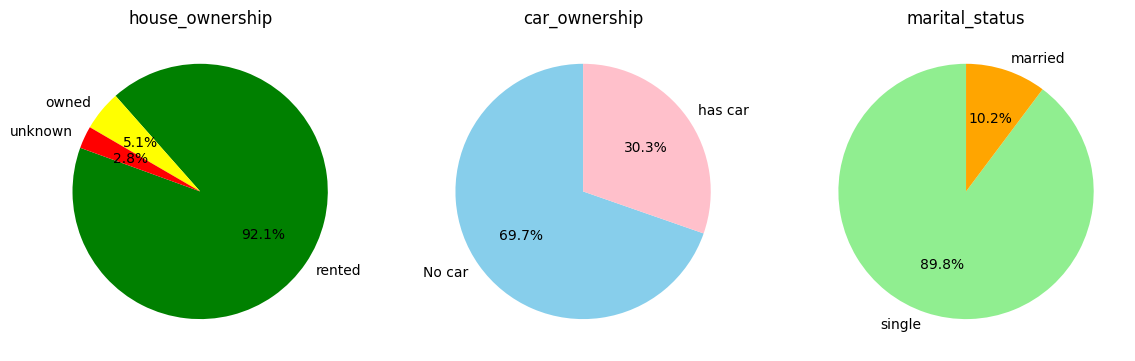

In [17]:
#pie chart 
# for car_ownership
labels = ['No car', 'has car']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
df['car_ownership'].value_counts().plot.pie(ax = axes[1], labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
axes[1].set_title('car_ownership')
axes[1].set_ylabel('')

# for marital_status
df['marital_status'].value_counts().plot.pie(ax = axes[2], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
axes[2].set_title('marital_status')
axes[2].set_ylabel('')

# for house_ownership
df['house_ownership'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=160, colors=['green', 'yellow', 'red'])
axes[0].set_title('house_ownership')
axes[0].set_ylabel('')

plt.show()

In [18]:
df.house_ownership.value_counts()

house_ownership
rented     92088
owned       5081
unknown     2831
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder as LE

new_df = df.copy()
encoders = {}
for feature in new_df.columns:
    if new_df[feature].dtype == 'object' and feature in ['marital_status', 'house_ownership'] :
        encoders[feature] = LE()
        new_df[feature] = encoders[feature].fit_transform(new_df[feature])

In [20]:
#lets filter out the unknown status ones
#filtered_house = df[df['house_ownership'] != 'unknown']['house_ownership']

In [21]:
df.marital_status.value_counts()

marital_status
single     89763
married    10237
Name: count, dtype: int64

In [22]:
new_df.head()

,applicant_id,annual_income,applicant_age,work_experience,marital_status,house_ownership,car_ownership,occupation,residence_city,residence_state,years_in_current_employment,years_in_current_residence,loan_default_risk
0,75722,9657655,76,0,1,1,0,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,1,1,0,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,1,1,0,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,1,0,0,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,1,1,0,Air_traffic_controller,Asansol,West_Bengal,9,13,0


# occupation, residance_city, residence_state ---> `OneHotEncoder`

But before encoding, let's explore them a lil bit...

In [23]:
df.head()

,applicant_id,annual_income,applicant_age,work_experience,marital_status,house_ownership,car_ownership,occupation,residence_city,residence_state,years_in_current_employment,years_in_current_residence,loan_default_risk
0,75722,9657655,76,0,single,rented,0,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,0,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,0,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,0,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,0,Air_traffic_controller,Asansol,West_Bengal,9,13,0


let's first see the payment based on occupation, meaning the earning per occupation

In [24]:
#df['occupation'].value_counts()
df_revenue_occ = df.groupby('occupation').agg({'annual_income':'mean'}).reset_index(drop=False).sort_values(by='annual_income', ascending=False)

In [25]:
df_revenue_occ.columns

Index(['occupation', 'annual_income'], dtype='object')

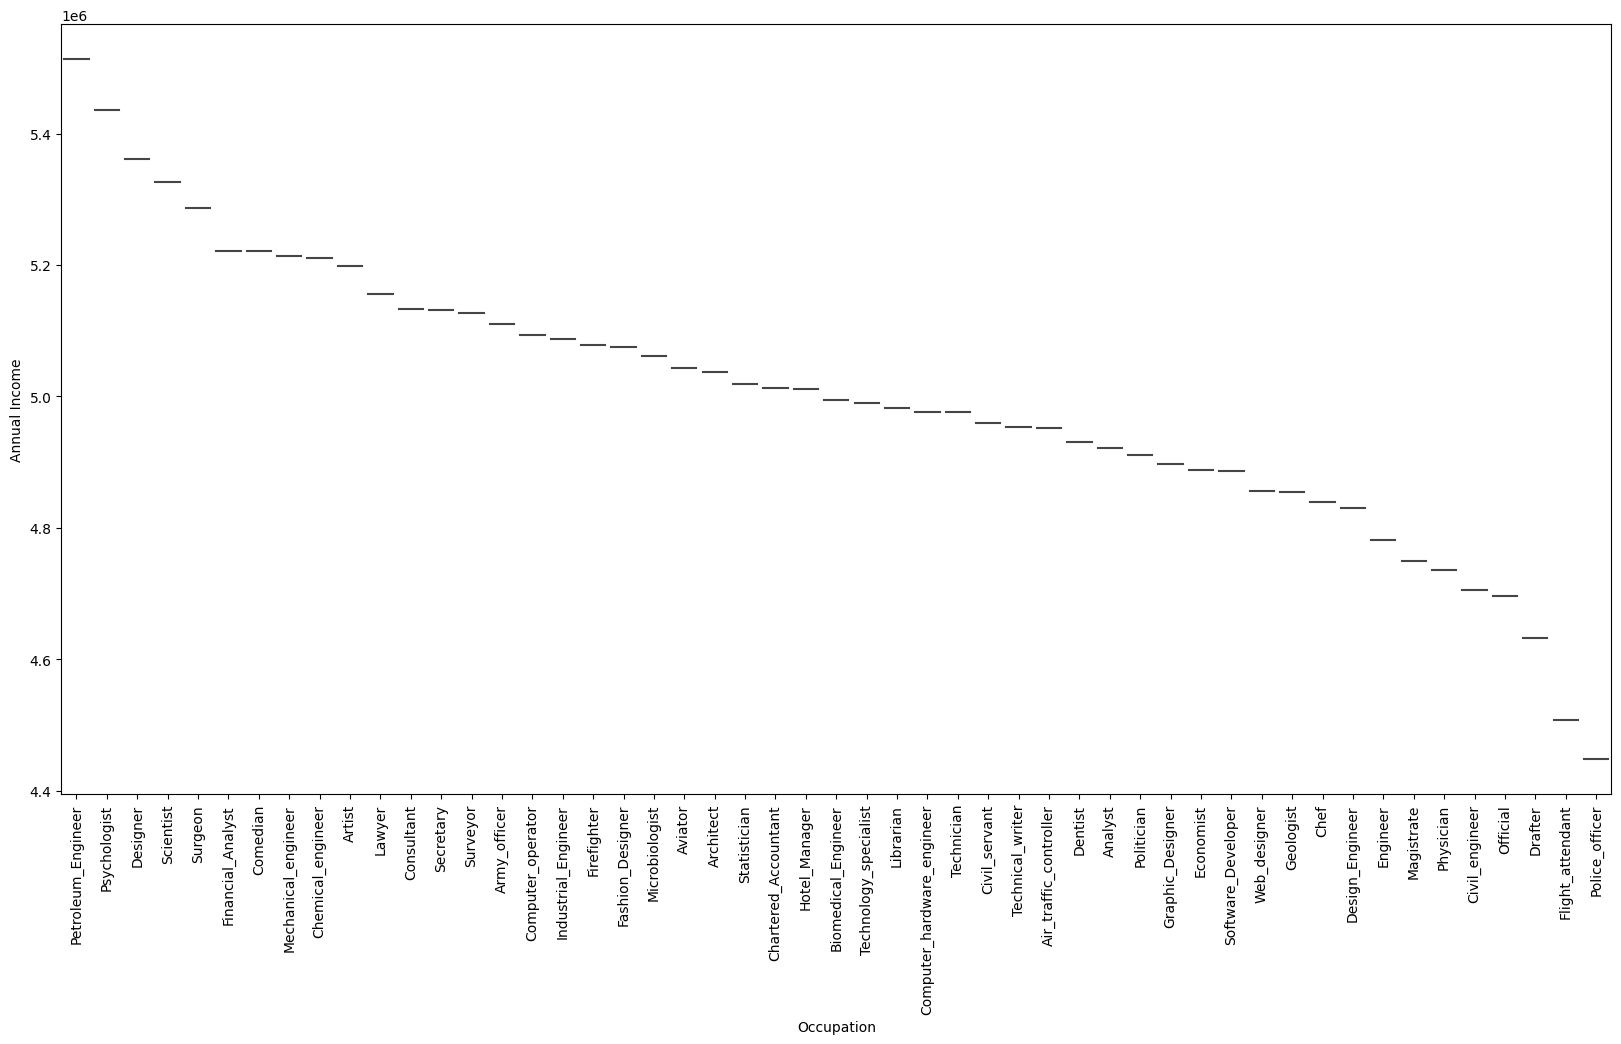

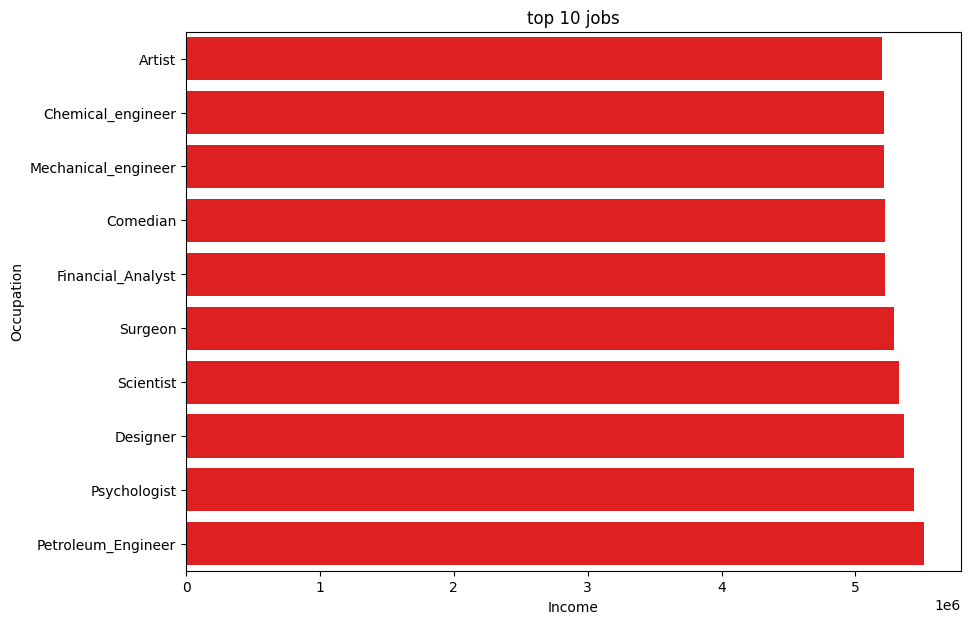

In [26]:
plot, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

sns.violinplot(data=df_revenue_occ,
               x='occupation',
               y='annual_income',
               ax=axes)

axes.set_ylabel('Annual Income')  
axes.set_xlabel('Occupation')  
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)  

plt.show()

## same but horizontal
plot1, ax = plt.subplots(figsize=(10,7))
sns.barplot(y=df_revenue_occ['occupation'].head(10), x=df_revenue_occ['annual_income'].head(10), color='red', )
ax.invert_yaxis()
ax.set_xlabel('Income')
ax.set_ylabel('Occupation')
ax.set_title('top 10 jobs')
plt.show()

In [27]:
#df['occupation'].value_counts()
top_10_revenue_occ = df.groupby('occupation').agg({'annual_income':'mean'}).reset_index(drop=False).sort_values(by='annual_income', ascending=False).loc[0:10]

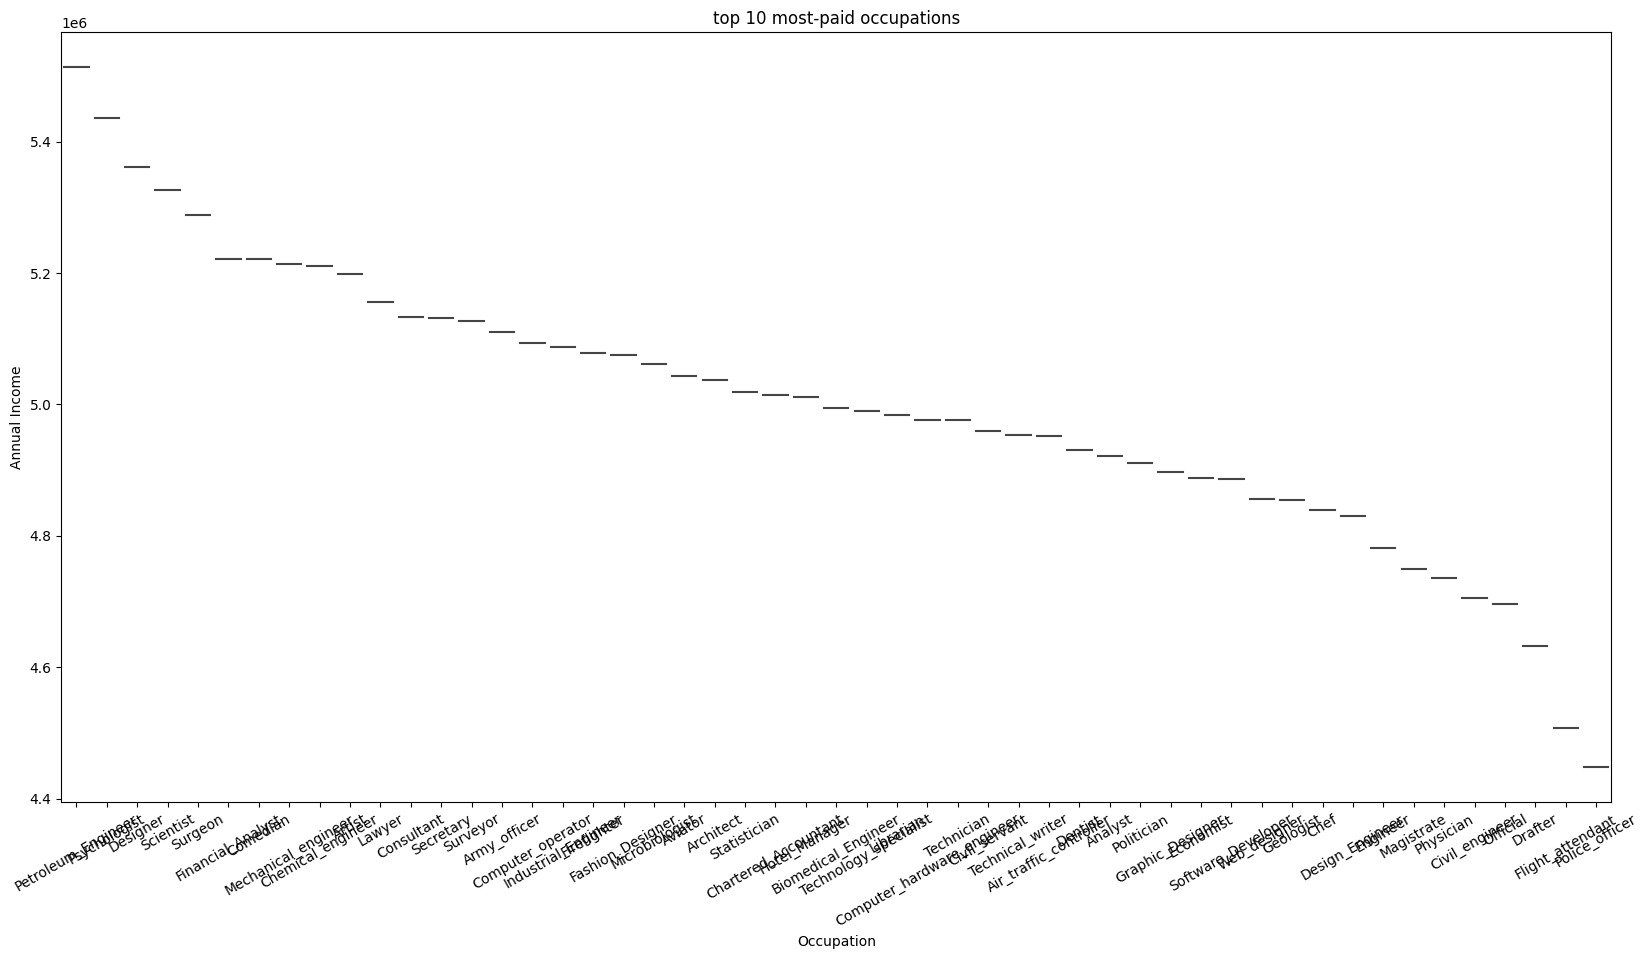

In [28]:
plot, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

sns.violinplot(data=df_revenue_occ,
               x='occupation',
               y='annual_income',
               ax=axes)

axes.set_ylabel('Annual Income')  
axes.set_xlabel('Occupation')  
axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
axes.set_title( 'top 10 most-paid occupations')
plt.show()

In [29]:
df.occupation.value_counts()

occupation
Physician                     2426
Statistician                  2338
Fashion_Designer              2189
Psychologist                  2188
Magistrate                    2169
Computer_hardware_engineer    2169
Web_designer                  2153
Drafter                       2133
Comedian                      2103
Mechanical_engineer           2097
Chemical_engineer             2087
Air_traffic_controller        2087
Industrial_Engineer           2086
Financial_Analyst             2079
Flight_attendant              2073
Technical_writer              2060
Graphic_Designer              2059
Hotel_Manager                 2052
Secretary                     2044
Biomedical_Engineer           2039
Petroleum_Engineer            2028
Software_Developer            2016
Police_officer                1988
Computer_operator             1966
Politician                    1964
Microbiologist                1918
Technician                    1916
Consultant                    1911
Surgeon  

In [30]:
df.loan_default_risk.value_counts()

loan_default_risk
0    87003
1    12997
Name: count, dtype: int64

## implementation 1
## Occupation ---> simple `one_hotencoder`

In [31]:
from sklearn.preprocessing import OneHotEncoder
#col ---> cat ----> onehotencoder ---> multicol ----> concat to back to the df

new_df = df.copy()
cat_feture = new_df[['occupation']]
ohe = OneHotEncoder()
cat_feture_transformerd = ohe.fit_transform(cat_feture)
#type(cat_feture_transformerd)
cat_feature_array = cat_feture_transformerd.toarray()
#dir(cat_feture_transformerd)
cat_feature_df = pd.DataFrame(cat_feature_array, columns=ohe.get_feature_names_out(cat_feture.columns))

new_df = pd.concat([new_df, cat_feature_df], axis=1 )

In [32]:
new_df.shape

(100000, 64)

## Takeout:
Onehot encoding might not be a good approach to encode the occupation bc it is adding too much unneccessary columns to our dataset, while we could have enocde it with the same approach of `label_encoder` but for the sake of practice, i will continue with this approach to modeling process. NOTE that in the modeling phase, in contrast to my other notebooks that i filter out some features n did the prediction based on those features, here due to the nature of the df n occupation getting unpacked to onehot encoders, ill just pass entire df to the model, rather than filtering features

## Modeling process with `new_df`

In [33]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression

In [63]:
X = new_df.drop(columns=['loan_default_risk', 'residence_city',
       'residence_state', 'occupation'])
y = new_df['loan_default_risk']

In [64]:
from sklearn.preprocessing import LabelEncoder as LE


encoders = {}
for feature in X.columns:
    if X[feature].dtype == 'object' and feature in ['marital_status', 'house_ownership'] :
        encoders[feature] = LE()
        X[feature] = encoders[feature].fit_transform(new_df[feature])

In [65]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state = 42)

In [66]:
X_train['marital_status'].value_counts()

marital_status
1    67283
0     7717
Name: count, dtype: int64

In [67]:
logreg = LogisticRegression()

In [68]:
X_train.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [69]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = logreg.predict(X_test)

In [71]:
acc = np.mean(y_pred==y_test)

In [72]:
acc

0.87244

## Implementation 2
## Occupation ---> simple `one_hotencoder` with columnTransformer and pipeline

In [ ]:
new_df

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Make a copy of the original DataFrame
new_df = df.copy()

# List of categorical features to encode
categorical_features = ['occupation']

# Define the transformations for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations to the DataFrame
new_df = preprocessor.fit_transform(new_df)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Make a copy of the original DataFrame
new_df = df.copy()

# Create a OneHotEncoder instance for the 'occupation' column
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the 'occupation' column
encoded_occupation = encoder.fit_transform(new_df[['occupation']]).toarray()

# Convert the encoded array into a DataFrame
encoded_occupation_df = pd.DataFrame(encoded_occupation, columns=encoder.get_feature_names_out(['occupation']))

# Concatenate the encoded DataFrame with the original DataFrame
new_df = pd.concat([new_df, encoded_occupation_df], axis=1)

# Drop the original 'occupation' column
new_df.drop('occupation', axis=1, inplace=True)


In [ ]:
new_df